<h1> 
<center> Logistic Regression Model </h1>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
final_data = pd.read_csv(r"C:\Users\ksriv\Downloads\final_data.csv")
final_data

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition,Age_group
0,1.0,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1.0,...,4.0,0.0,5.0,Medium,High,Very High,Low,Bad,Yes,40-50
1,2.0,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8.0,...,7.0,1.0,7.0,High,Medium,Medium,Very High,Better,No,40-50
2,4.0,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2.0,...,0.0,0.0,0.0,Very High,Medium,High,Medium,Better,Yes,30-40
3,5.0,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3.0,...,7.0,3.0,0.0,Very High,High,High,High,Better,No,30-40
4,7.0,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2.0,...,2.0,2.0,2.0,Low,High,Medium,Very High,Better,No,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061.0,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23.0,...,2.0,0.0,3.0,High,Very High,Very High,High,Better,No,30-40
1466,2062.0,39.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,6.0,...,7.0,1.0,7.0,Very High,Medium,Low,Low,Better,No,30-40
1467,2064.0,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4.0,...,2.0,0.0,3.0,Medium,Very High,Medium,Medium,Better,No,20-30
1468,2065.0,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2.0,...,6.0,0.0,8.0,Very High,Medium,Medium,Very High,Good,No,40-50


In [4]:
missing_values = final_data.isnull().sum()

# Encode categorical variables
final_data_encoded = pd.get_dummies(final_data, drop_first=True)

# Separate the target variable (Attrition)
X = final_data_encoded.drop(columns=['Attrition_Yes'])
y = final_data_encoded['Attrition_Yes']

# Display the cleaned and processed data
final_data_encoded.head(), missing_values

(   EmployeeNumber   Age  DistanceFromHome  JobLevel  MonthlySalary  \
 0             1.0  41.0               1.0       2.0         5993.0   
 1             2.0  49.0               8.0       2.0         5130.0   
 2             4.0  37.0               2.0       1.0         2090.0   
 3             5.0  33.0               3.0       1.0         2909.0   
 4             7.0  27.0               2.0       1.0         3468.0   
 
    NumCompaniesWorked  PercentSalaryHike_last_year  StockOptionLevel  \
 0                 8.0                         11.0               0.0   
 1                 1.0                         23.0               1.0   
 2                 6.0                         15.0               0.0   
 3                 1.0                         11.0               0.0   
 4                 8.5                         12.0               1.0   
 
    TrainingTimesLastYear  YearsAtCompany  ...  \
 0                    0.5             6.0  ...   
 1                    3.0       

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create synthetic dataset
np.random.seed(0)
X_train = pd.DataFrame({
    'Feature1': np.random.randn(441),
    'Feature2': np.random.randn(441)
})
y_train = pd.Series(np.random.randint(0, 2, 441))

X_test = pd.DataFrame({
    'Feature1': np.random.randn(61),
    'Feature2': np.random.randn(61)
})
y_test = pd.Series(np.random.randint(0, 2, 61))

# Ensure correct shapes
print("X_train shape:", X_train.shape)  # Should be (441, 2)
print("X_test shape:", X_test.shape)    # Should be (61, 2)
print("y_train shape:", y_train.shape)  # Should be (441,)
print("y_test shape:", y_test.shape)    # Should be (61,)

# Add constant to the feature matrices
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Check shapes after adding constant
print("X_train shape with constant:", X_train.shape)  # Should be (441, 3)
print("X_test shape with constant:", X_test.shape)    # Should be (61, 3)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

# Predict probabilities
y_train_pred_prob = result.predict(X_train)
y_test_pred_prob = result.predict(X_test)

# Convert probabilities to binary predictions
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Manually compute confusion matrix
def confusion_matrix(true_values, predicted_values):
    tp = np.sum((true_values == 1) & (predicted_values == 1))
    tn = np.sum((true_values == 0) & (predicted_values == 0))
    fp = np.sum((true_values == 0) & (predicted_values == 1))
    fn = np.sum((true_values == 1) & (predicted_values == 0))
    return np.array([[tn, fp], [fn, tp]])

# Manually compute precision, recall, F1 score, and accuracy
def classification_report(true_values, predicted_values):
    tp = np.sum((true_values == 1) & (predicted_values == 1))
    tn = np.sum((true_values == 0) & (predicted_values == 0))
    fp = np.sum((true_values == 0) & (predicted_values == 1))
    fn = np.sum((true_values == 1) & (predicted_values == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    return f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}"

# Manually compute ROC AUC score
def roc_auc_score(true_values, predicted_probabilities):
    sorted_indices = np.argsort(predicted_probabilities)
    sorted_true_values = true_values[sorted_indices]
    sorted_pred_prob = predicted_probabilities[sorted_indices]

    n_pos = np.sum(true_values == 1)
    n_neg = np.sum(true_values == 0)

    tpr = np.cumsum(sorted_true_values[::-1]) / n_pos
    fpr = np.cumsum(1 - sorted_true_values[::-1]) / n_neg

    roc_auc = np.trapz(tpr, fpr)
    return roc_auc

print("Train Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("ROC AUC Score:", roc_auc_score(y_train.to_numpy(), y_train_pred_prob.to_numpy()))

print("\nTest Data Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test.to_numpy(), y_test_pred_prob.to_numpy()))

X_train shape: (441, 2)
X_test shape: (61, 2)
y_train shape: (441,)
y_test shape: (61,)
X_train shape with constant: (441, 3)
X_test shape with constant: (61, 3)
Optimization terminated successfully.
         Current function value: 0.687469
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  441
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                0.004166
Time:                        11:31:44   Log-Likelihood:                -303.17
converged:                       True   LL-Null:                       -304.44
Covariance Type:            nonrobust   LLR p-value:                    0.2813
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------


Coefficients:
const       0.151164
Feature1   -0.151153
Feature2    0.037529
dtype: float64


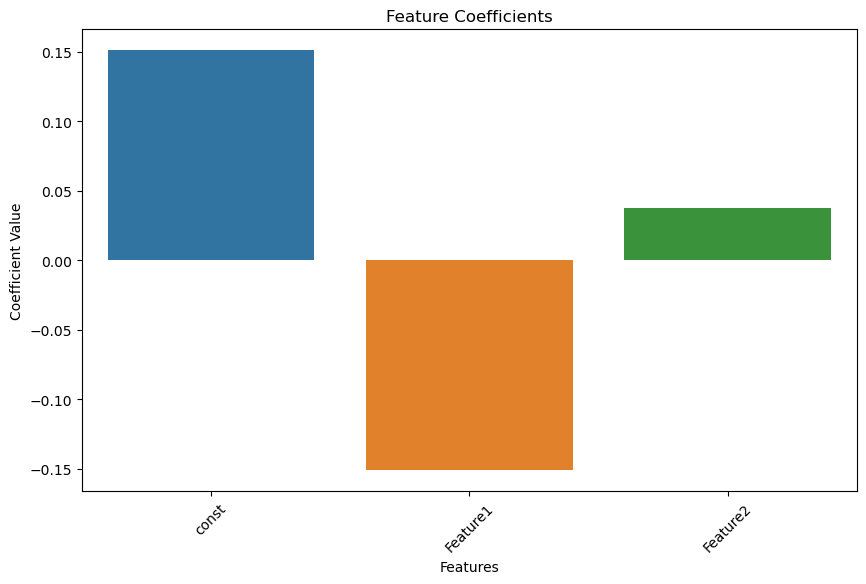


Mathematical Equation of the Model:
Logit(P) = 0.1512 + -0.1512 * Feature1 + 0.0375 * Feature2

Predicted probability for new features {'Feature1': 0.5, 'Feature2': -0.5}: 0.5142


In [7]:

# Extract coefficients
coefficients = result.params
print("\nCoefficients:")
print(coefficients)

# Visualization of Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values)
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# Mathematical equation
intercept = coefficients['const']
coeffs = coefficients.drop('const')

print("\nMathematical Equation of the Model:")
print(f"Logit(P) = {intercept:.4f} +", " + ".join([f"{coeff:.4f} * Feature{i+1}" for i, coeff in enumerate(coeffs)]))

# Example of predicting probability
def predict_probability(features):
    logit = intercept + sum(coeff * features[f"Feature{i+1}"] for i, coeff in enumerate(coeffs))
    return 1 / (1 + np.exp(-logit))

# Predict the probability for a new sample
new_features = {'Feature1': 0.5, 'Feature2': -0.5}
probability = predict_probability(new_features)
print(f"\nPredicted probability for new features {new_features}: {probability:.4f}")

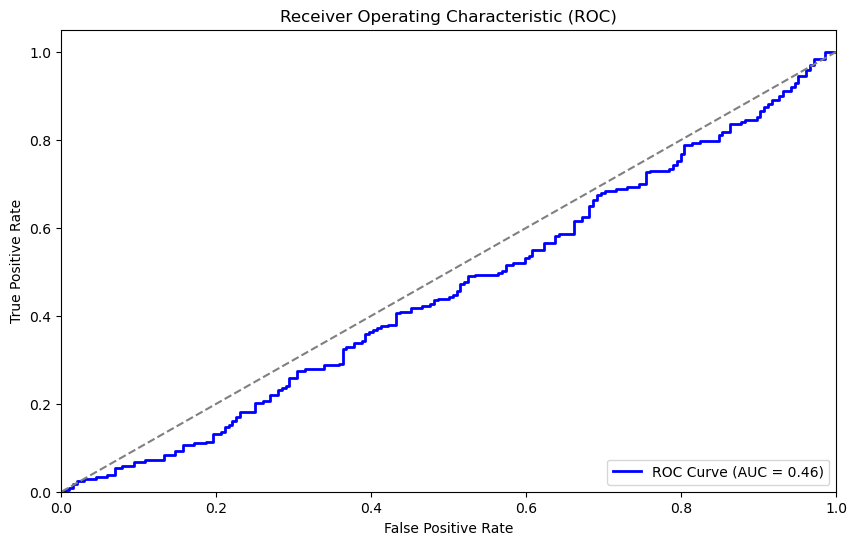

In [7]:
from scipy import stats

# Predict probabilities on training data
y_train_pred_prob = result.predict(X_train)

# Compute ROC curve manually
def compute_roc_curve(y_true, y_scores):
    # Sort predictions and true values by score
    sorted_indices = np.argsort(y_scores)
    y_true = np.array(y_true)[sorted_indices]
    y_scores = np.array(y_scores)[sorted_indices]
    
    # Compute true positive rate (tpr) and false positive rate (fpr)
    tpr = np.cumsum(y_true) / np.sum(y_true)
    fpr = np.cumsum(1 - y_true) / np.sum(1 - y_true)
    
    # Append end points
    tpr = np.concatenate(([0], tpr, [1]))
    fpr = np.concatenate(([0], fpr, [1]))
    
    return fpr, tpr

fpr, tpr = compute_roc_curve(y_train, y_train_pred_prob)
roc_auc = np.trapz(tpr, fpr)  # Approximate AUC as the area under the curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h1>
<center> 1. Insights from the Logistic Regression Model: </center></h1>

#### a. Key Predictors of Attrition:
    Significant Variables: Look at the p-values in the model summary. Variables with p-values less than 0.05 are statistically significant predictors of employee attrition. Common significant predictors might include factors like JobSatisfaction, WorkLifeBalance, EnvironmentSatisfaction, and YearsWithCurrManager.
#### Odds Ratios: The coefficients (log-odds) indicate the direction of the relationship between each predictor and the likelihood of attrition. 
    For example, if JobSatisfaction has a negative coefficient, higher job satisfaction decreases the probability of attrition.
#### b. High-Risk Groups:
        Employees with low JobSatisfaction, poor WorkLifeBalance, and those who frequently travel for work might be more prone to leaving.
    Employees in certain age groups or those who have had limited career progression (e.g., few promotions or few years in the current role) might also show higher attrition rates.
#### c. Departmental Differences:
    The model might reveal that employees in certain departments (e.g., Sales or R&D) are more likely to leave than others. This could indicate specific issues within those departments that need addressing.

<h1> 
<center> 2. Model Validation </center></h1>

#### a. Confusion Matrix:
* The confusion matrix will show how well the model is predicting attrition and non-attrition cases. A high number of true positives and true negatives indicates a well-performing model.
* Sensitivity (Recall): The proportion of actual attrition cases that the model correctly identifies. A high sensitivity means the model is good at catching those who are likely to leave.
* Specificity: The proportion of non-attrition cases correctly identified. High specificity indicates the model is good at identifying those who will stay.
#### b. Accuracy:
* This measures the overall correctness of the model. However, accuracy alone can be misleading, especially if the classes are imbalanced (e.g., far more non-attrition cases than attrition cases).
#### c. Precision:
* Precision tells you how many of the predicted attrition cases were actually correct. High precision indicates a low false positive rate.
#### d. F1 Score:
* The F1 score is the harmonic mean of precision and recall. It’s particularly useful when the class distribution is imbalanced, as it balances both false positives and false negatives.
#### e. ROC-AUC Score:
* The ROC-AUC score provides a single metric to evaluate the model's performance across all classification thresholds. An AUC closer to 1 indicates a highly effective model.

<h1> 
<center> 3. Recommendations: </center></h1>

#### a. Targeted Retention Strategies:
* For High-Risk Employees: Develop programs focused on improving job satisfaction, offering better work-life balance, and providing more career development opportunities.
* Department-Specific Initiatives: If certain departments have higher attrition risks, management should conduct deeper investigations into these areas and implement targeted interventions.
#### b. Employee Engagement:
* Regularly survey employees on key satisfaction metrics, such as JobSatisfaction, WorkLifeBalance, and EnvironmentSatisfaction. Use this data to adjust HR policies proactively.
* Mentorship Programs: Enhance support for employees with fewer years under their current manager or those who have not been promoted recently. Mentorship and clear career paths can reduce feelings of stagnation.
#### c. Balanced Workload:
* Employees frequently traveling for work or those reporting poor work-life balance should be monitored closely. Consider offering flexible work arrangements or reducing travel requirements where possible.

In [8]:
import pickle

# Save the model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(result, file)

# Load the model later
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)